# SModelS – a tool for interpreting simplified-model results from the LHC

 <img src=https://smodels.github.io/images/banner720.png />

Jan Heisig and Andre Lessa, for the SModelS collaboration.

Re-Interpretation Workshop 2021, February 2021. Updated for SModelS 2.3.2 by WW, Sept 2023.

## Preparatory step -- installation:

### Check the installation instructions [here](https://indico.cern.ch/event/982553/contributions/4220784/attachments/2184008/3700911/smodels-installation.pdf) or install via pip:

In [1]:
# smodels is registered at the python packaging index
!pip3 install --upgrade smodels==2.3.2

  Using cached smodels-2.3.2-py3-none-any.whl
  Attempting uninstall: smodels
    Found existing installation: smodels 2.3.1
    Not uninstalling smodels at /home/walten/git/smodels, outside environment /home/walten/.venvs/311
    Can't uninstall 'smodels'. No files were found to uninstall.


### Clone the repository, for google colab

In [2]:
!test -x parameters.ini && wget https://github.com/SModelS/tutorials/blob/main/parameters.ini

### Check installation:

In [ ]:
!runSModelS.py --help

In [3]:
!runSModelS.py -f slhaFiles/simplyGluino.slha -p parameters.ini

WARNING in databaseObj.fetchFromScratch() in 670: downloading the database from https://smodels.github.io/database/official230 and caching in /home/walten/.cache/smodels. If you want the pickled database file to be cached in a different location, set the environment variable SMODELS_CACHEDIR, e.g. to '/tmp'.
INFO in databaseObj.fetchFromScratch() in 671: need to fetch https://zenodo.org/record/7961638/files/official230.pcl and store in /home/walten/.cache/smodels/official230.pcl. size is 1.0GB.
loading >.                                                  <..................................................
INFO in databaseObj.fetchFromScratch() in 695: fetched https://zenodo.org/record/7961638/files/official230.pcl in 342 secs.
INFO in databaseObj.loadBinaryFile() in 505: loading binary db file /home/walten/.cache/smodels/official230.pcl format version 214
INFO in databaseObj.loadBinaryFile() in 512: Loaded database from /home/walten/.cache/smodels/official230.pcl in 1.0 secs.
INFO in mo

## First Step: Run SModelS for a single file

In [4]:
!runSModelS.py -p parameters.ini -f slhaFiles/wino_11010599.slha

INFO in databaseObj.loadBinaryFile() in 505: loading binary db file /home/walten/.cache/smodels/official230.pcl format version 214
INFO in databaseObj.loadBinaryFile() in 512: Loaded database from /home/walten/.cache/smodels/official230.pcl in 1.1 secs.
INFO in modelTester.testPoints() in 341: Running SModelS for a single file
WARNING in printer.setOutPutFile() in 839: Removing old output file ./results/wino_11010599.slha.py
WARNING in printer.setOutPutFile() in 668: Removing old output file ./results/wino_11010599.slha.smodels
INFO in model.updateParticles() in 393: Loaded 62 BSM particles
INFO in model.updateParticles() in 393: Loaded 62 BSM particles
Input status: 1
Decomposition output status: 1 #decomposition was successful
# Input File: slhaFiles/wino_11010599.slha
# checkinput = True
# combinesrs = False
# computestatistics = True
# docompress = True
# doinvisible = True
# maxcond = 0.2
# minmassgap = 5.
# model = share.models.mssm
# ncpus = 1
# promptwidth = 1e-8
# sigmacut = 0

## Second Step: Run SModelS for multiple files

In [5]:
!runSModelS.py -p parameters_idm.ini -f slhaFiles/IDM_points -o results/IDM_output

INFO in databaseObj.loadBinaryFile() in 505: loading binary db file /home/walten/.cache/smodels/official230.pcl format version 214
INFO in databaseObj.loadBinaryFile() in 512: Loaded database from /home/walten/.cache/smodels/official230.pcl in 1.0 secs.
INFO in modelTester.testPoints() in 348: Running SModelS for 249 files with a single process. Messages will be redirected to smodels.log


## Third Step: plot the results

### Plot IDM results

In [14]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import pyslha
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import imp,glob,os
cm = matplotlib.colormaps.get_cmap('RdYlBu')

### Define path to SLHA and results folders

In [15]:
slhaFolder = './slhaFiles/IDM_points'
resultsFolder = './results/IDM_output'

### Read SModelS results

In [16]:
#Convert Experimental Results list to a dictionary
data = []
for f in glob.glob(resultsFolder+'/*.py'):
    smodelsDict = imp.load_source(f.replace('.py',''),f).smodelsOutput
    slhaFile = os.path.basename(smodelsDict['OutputStatus']['input file'])
    slhaFile = os.path.join(slhaFolder,slhaFile)
    #Read SLHA file (using pyslha):
    slhaData = pyslha.readSLHAFile(slhaFile)
    data.append((slhaData,smodelsDict))

In [17]:
mHc = []
ctau = []
r = []
for slhaData,smodelsDict in data:
    if not 'ExptRes' in smodelsDict: #If no results were applicable, point is allowed
        rmax = 0.0
    else:
        rmax = smodelsDict['ExptRes'][0]['r'] #First result is the most constraining
    mass = slhaData.blocks['MASS'][37] #H+ mass
    width = slhaData.decays[37].totalwidth #H+ mass
    if width:    
        ct = 1.967e-16/width
    else:
        ct = 1e7
    
    mHc.append(mass)
    ctau.append(ct)
    r.append(rmax)

### Plot results:

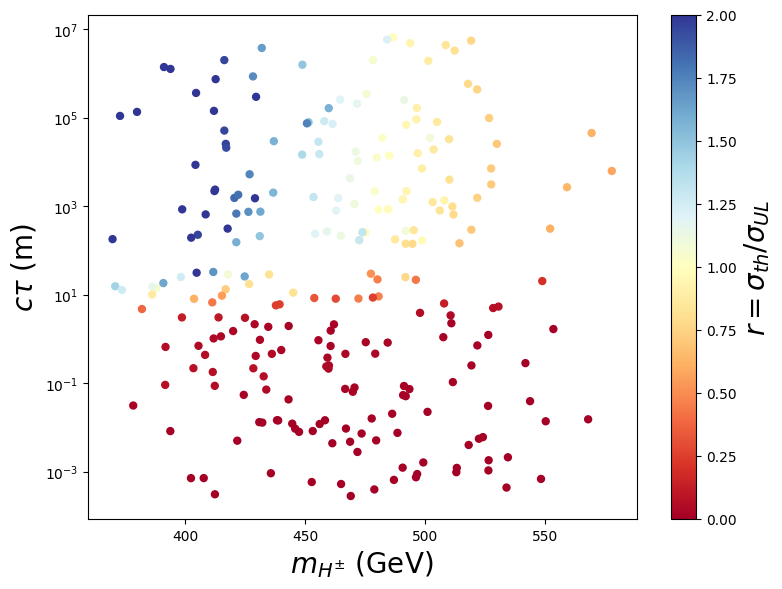

In [18]:
plt.figure(figsize=(8,6))
cp = plt.scatter(mHc,ctau, c=r, vmin=0., vmax=2., s=25, cmap=cm)
cb = plt.colorbar(cp)
plt.yscale('log')
plt.xlabel(r'$m_{H^{\pm}}$ (GeV)',fontsize=20)    
plt.ylabel(r'$c\tau$ (m)',fontsize=20)
cb.set_label(r'$r=\sigma_{th}/\sigma_{UL}$',fontsize=20)
plt.tight_layout()
plt.show()